In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('./core/Teams.csv')

In [4]:
df.head()

yearID lgID teamID franchID divID  Rank   G  Ghome   W   L DivWin WCWin  \
0    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10    NaN   NaN   
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9    NaN   NaN   
2    1871  NaN    CL1      CFC   NaN     8  29    NaN  10  19    NaN   NaN   
3    1871  NaN    FW1      KEK   NaN     7  19    NaN   7  12    NaN   NaN   
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17    NaN   NaN   

  LgWin WSWin    R    AB    H  2B  3B  HR    BB    SO    SB    CS  HBP  SF  \
0     N   NaN  401  1372  426  70  37   3  60.0  19.0  73.0  16.0  NaN NaN   
1     N   NaN  302  1196  323  52  21  10  60.0  22.0  69.0  21.0  NaN NaN   
2     N   NaN  249  1186  328  35  40   7  26.0  25.0  18.0   8.0  NaN NaN   
3     N   NaN  137   746  178  19   8   2  33.0   9.0  16.0   4.0  NaN NaN   
4     N   NaN  302  1404  403  43  21   1  33.0  15.0  46.0  15.0  NaN NaN   

    RA   ER   ERA  CG  SHO  SV  IPouts   HA  HRA  BBA  SOA    E  DP     FP  \
0  303  109  3.55  22    1   3     828  367    2   42   23  243  24  0.834   
1  241   77  2.76  25    0   1     753  308    6   28   22  229  16  0.829   
2  341  116  4.11  23    0   0     762  346   13   53   34  234  15  0.818   
3  243   97  5.17  19    1   0     507  261    5   21   17  163   8  0.803   
4  313  121  3.72  32    1   0     879  373    7   42   22  235  14  0.840   

                      name                          park  attendance  BPF  \
0     Boston Red Stockings           South End Grounds I         NaN  103   
1  Chicago White Stockings       Union Base-Ball Grounds         NaN  104   
2   Cleveland Forest Citys  National Association Grounds         NaN   96   
3     Fort Wayne Kekiongas                Hamilton Field         NaN  101   
4         New York Mutuals      Union Grounds (Brooklyn)         NaN   90   

   PPF teamIDBR teamIDlahman45 teamIDretro  
0   98      BOS            BS1         BS1  
1  102      CHI            CH1         CH1  
2  100      CLE            CL1         CL1  
3  107      KEK            FW1         FW1  
4   88      NYU            NY2         NY2

In [5]:
df.shape

(2895, 48)

In [6]:
df.describe()

yearID         Rank            G        Ghome            W  \
count  2895.000000  2895.000000  2895.000000  2496.000000  2895.000000   
mean   1956.963040     4.072539   150.692919    78.556891    74.942314   
std      42.260337     2.308810    22.968790     4.638081    17.530459   
min    1871.000000     1.000000     6.000000    44.000000     0.000000   
25%    1921.000000     2.000000   154.000000    77.000000    66.000000   
50%    1965.000000     4.000000   158.000000    81.000000    77.000000   
75%    1994.000000     6.000000   162.000000    81.000000    87.000000   
max    2018.000000    13.000000   165.000000    84.000000   116.000000   

                 L            R           AB            H           2B  \
count  2895.000000  2895.000000  2895.000000  2895.000000  2895.000000   
mean     74.942314   683.611744  5154.547496  1347.913644   229.140933   
std      17.274056   134.572259   741.546183   216.989317    58.673209   
min       4.000000    24.000000   211.000000    33.000000     1.000000   
25%      66.000000   615.000000  5142.000000  1303.000000   195.000000   
50%      76.000000   691.000000  5404.000000  1393.000000   233.000000   
75%      87.000000   764.000000  5520.500000  1466.000000   272.000000   
max     134.000000  1220.000000  5781.000000  1783.000000   376.000000   

                3B           HR           BB           SO           SB  \
count  2895.000000  2895.000000  2894.000000  2879.000000  2769.000000   
mean     46.506736   103.967530   475.229440   751.031956   111.022391   
std      22.260486    62.781245   130.915516   308.694949    70.055574   
min       0.000000     0.000000     1.000000     3.000000     1.000000   
25%      30.000000    43.000000   427.000000   513.500000    64.000000   
50%      41.000000   109.000000   494.000000   755.000000    94.000000   
75%      59.000000   153.000000   554.000000   980.500000   139.000000   
max     150.000000   267.000000   835.000000  1594.000000   581.000000   

                CS          HBP           SF           RA           ER  \
count  2063.000000  1737.000000  1354.000000  2895.000000  2895.000000   
mean     47.691226    45.364421    45.047267   683.610708   574.138860   
std      21.573868    17.689532     9.231481   134.023139   146.963575   
min       3.000000     7.000000    18.000000    34.000000    23.000000   
25%      34.000000    32.000000    39.000000   611.000000   504.000000   
50%      45.000000    43.000000    45.000000   689.000000   594.000000   
75%      57.000000    56.000000    51.000000   765.500000   669.000000   
max     191.000000   160.000000    77.000000  1252.000000  1023.000000   

               ERA           CG          SHO           SV       IPouts  \
count  2895.000000  2895.000000  2895.000000  2895.000000  2895.000000   
mean      3.823174    48.980656     9.685665    24.216235  4032.811744   
std       0.762745    39.056428     5.032649    16.351810   623.227983   
min       1.220000     0.000000     0.000000     0.000000   162.000000   
25%       3.360000    11.000000     6.000000     9.000000  4080.000000   
50%       3.830000    43.000000     9.000000    25.000000  4251.000000   
75%       4.310000    77.000000    13.000000    38.000000  4342.000000   
max       8.000000   148.000000    32.000000    68.000000  4518.000000   

                HA          HRA          BBA          SOA            E  \
count  2895.000000  2895.000000  2895.000000  2895.000000  2895.000000   
mean   1347.686356   103.967530   475.424870   750.522971   184.138860   
std     216.955229    59.625974   130.396145   309.842690   108.208599   
min      49.000000     0.000000     1.000000     0.000000    47.000000   
25%    1290.500000    49.000000   430.000000   506.500000   114.000000   
50%    1392.000000   112.000000   496.000000   754.000000   143.000000   
75%    1470.000000   152.000000   554.000000   985.500000   212.000000   
max    1993.000000   258.000000   827.000000  1687.000000   639.000000   

          

In [7]:
df.dtypes

yearID              int64
lgID               object
teamID             object
franchID           object
divID              object
Rank                int64
G                   int64
Ghome             float64
W                   int64
L                   int64
DivWin             object
WCWin              object
LgWin              object
WSWin              object
R                   int64
AB                  int64
H                   int64
2B                  int64
3B                  int64
HR                  int64
BB                float64
SO                float64
SB                float64
CS                float64
HBP               float64
SF                float64
RA                  int64
ER                  int64
ERA               float64
CG                  int64
SHO                 int64
SV                  int64
IPouts              int64
HA                  int64
HRA                 int64
BBA                 int64
SOA                 int64
E                   int64
DP          

In [8]:
df.isnull().sum()

yearID               0
lgID                50
teamID               0
franchID             0
divID             1517
Rank                 0
G                    0
Ghome              399
W                    0
L                    0
DivWin            1545
WCWin             2181
LgWin               28
WSWin              357
R                    0
AB                   0
H                    0
2B                   0
3B                   0
HR                   0
BB                   1
SO                  16
SB                 126
CS                 832
HBP               1158
SF                1541
RA                   0
ER                   0
ERA                  0
CG                   0
SHO                  0
SV                   0
IPouts               0
HA                   0
HRA                  0
BBA                  0
SOA                  0
E                    0
DP                   0
FP                   0
name                 0
park                34
attendance         279
BPF        

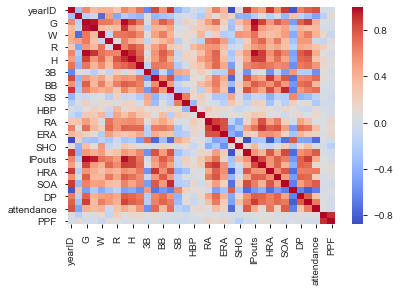

In [9]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [10]:
df._get_numeric_data().head()

yearID  Rank   G  Ghome   W   L    R    AB    H  2B  3B  HR    BB    SO  \
0    1871     3  31    NaN  20  10  401  1372  426  70  37   3  60.0  19.0   
1    1871     2  28    NaN  19   9  302  1196  323  52  21  10  60.0  22.0   
2    1871     8  29    NaN  10  19  249  1186  328  35  40   7  26.0  25.0   
3    1871     7  19    NaN   7  12  137   746  178  19   8   2  33.0   9.0   
4    1871     5  33    NaN  16  17  302  1404  403  43  21   1  33.0  15.0   

     SB    CS  HBP  SF   RA   ER   ERA  CG  SHO  SV  IPouts   HA  HRA  BBA  \
0  73.0  16.0  NaN NaN  303  109  3.55  22    1   3     828  367    2   42   
1  69.0  21.0  NaN NaN  241   77  2.76  25    0   1     753  308    6   28   
2  18.0   8.0  NaN NaN  341  116  4.11  23    0   0     762  346   13   53   
3  16.0   4.0  NaN NaN  243   97  5.17  19    1   0     507  261    5   21   
4  46.0  15.0  NaN NaN  313  121  3.72  32    1   0     879  373    7   42   

   SOA    E  DP     FP  attendance  BPF  PPF  
0   23  243  24  0.834         NaN  103   98  
1   22  229  16  0.829         NaN  104  102  
2   34  234  15  0.818         NaN   96  100  
3   17  163   8  0.803         NaN  101  107  
4   22  235  14  0.840         NaN   90   88

In [11]:
pp.ProfileReport(df)

In [12]:
w_l_by_team = df.groupby(['teamID','yearID'])[['G','W','L']].sum()

In [13]:
w_l_by_team.reset_index(inplace=True)

In [14]:
w_l_by_team.set_index('yearID', inplace=True)

In [15]:
w_l_by_team.head()

teamID    G   W   L
yearID                    
1884      ALT   25   6  19
1997      ANA  162  84  78
1998      ANA  162  85  77
1999      ANA  162  70  92
2000      ANA  162  82  80

In [16]:
import matplotlib.pyplot as plt

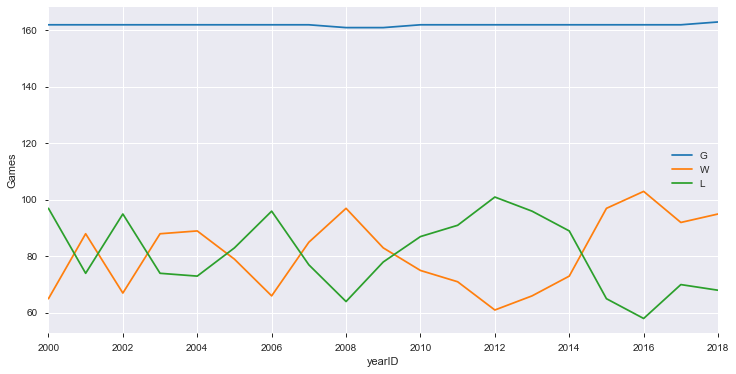

In [17]:
w_l_by_team[w_l_by_team['teamID'] == 'CHN'].loc[2000:2018].plot(figsize=(12,6))
plt.ylabel('Games');

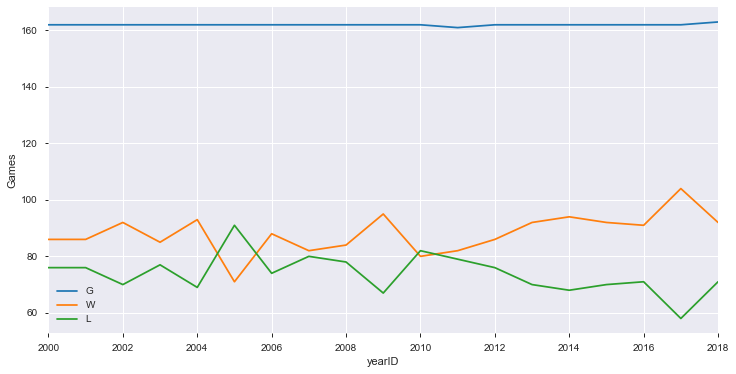

In [18]:
w_l_by_team[w_l_by_team['teamID'] == 'LAN'].loc[2000:2018].plot(figsize=(12,6))
plt.ylabel('Games');